# Римски императори

Тук ще се опитам да предскажа колко време ще управлява нов римски император. За целта ще използвам данните за императорите между Август (26г. пр.н.е.) и Теодосий Първи (395г.). Осъзнавам, че вероятно няма да има достатъчно голяма зависимост между данните и продължителноста на управление, но нищо не ми пречи да опитам. Ако имаше данни и за [следващите хиляда години римски императори](https://thehistoryofbyzantium.com/2017/01/09/all-the-emperors-in-rhyme/) може би положението щеше да е друго, но не :( Благодаря, Gibbon!

Също така, мисля да опитам да предскажа и за няколко от следващите императори, за които ще си въведа данните ръчно. Ако модела покаже някакъв смисъл, разбира се.

Data set-а е от kaggle - [линк](https://www.kaggle.com/lberder/roman-emperors-from-26-bc-to-395-ad/data). Данните трябва да се сложат във файл с име `roman-emperors.csv` в директорията, в която е notebook-a.

## Но какъв е смисъла от това?

Признавам, че шансовете утре да се появи нов римски император са ниски. Но ако все пак стане, ще знаем след колко време империята му ще е "освободена" и "демократиризирана" с помощта на "миротворци", подозрително управляващи танкова и самолети хахаха :D А и в упражнението сег овори за работа с данни, а не за полезни резултати.

In [1]:
# Първо няколко библиотеки, които ще ни трябват
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

%matplotlib inline

In [2]:
# Сега, ще заредя данните
romans_data = pd.read_csv('roman-emperors.csv', parse_dates=[3,4,8,9], index_col=['Index'])

# Няколко императора, за пример
romans_data[:5]

,Name,Full Name,Birth,Death,Birth City,Birth Province,Succession,Reign Start,Reign End,Cause,Killer,Dynasty,Era,Notes,Verif,Image
Index,,,,,,,,,,,,,,,,
52,Galerius,CAESAR GALERIVS VALERIVS MAXIMIANVS AVGVSTVS,0260-01-01T00:53:28+00:53,0311-05-01T00:53:28+00:53,Romuliana,Moesia Superior,Appointment by Emperor,0305-05-01T00:53:28+00:53,0311-05-01T00:53:28+00:53,Natural Causes,Disease,Constantinian,Dominate,"birth, death, reign.end are estimates",NaN,https://public.opendatasoft.com/api/datasets/1...
57,Lucinius I,CAESAR GAIVS VALERIVS LICINIVS AVGVSTVS,0250-01-01T00:53:28+00:53,0325-03-01T00:53:28+00:53,Felix Romuliana,Moesia Superior,Birthright,0308-11-11T00:53:28+00:53,0324-09-18T00:53:28+00:53,Execution,Other Emperor,Constantinian,Dominate,"birth, death, are only estimates",NaN,https://public.opendatasoft.com/api/datasets/1...
33,Philip I,CAESAR MARCVS IVLIVS PHILIPPVS AVGVSTVS,0204-01-01T00:53:28+00:53,0249-10-01T00:53:28+00:53,Shahba,Syria,Seized Power,0244-02-14T00:53:28+00:53,0249-10-01T00:53:28+00:53,Execution,Other Emperor,Gordian,Principate,reign.end is only estimate,NaN,https://public.opendatasoft.com/api/datasets/1...
36,Trebonianus Gallus,CAESAR GAIVS VIBIVS TREBONIANVS GALLVS AVGVSTVS,0206-01-01T00:53:28+00:53,0253-08-15T00:53:28+00:53,NaN,Italia,Appointment by Army,0251-06-15T00:53:28+00:53,0253-08-15T00:53:28+00:53,Assassination,Other Emperor,Gordian,Principate,"birth, death, reign.end, reign.start are estim...",NaN,https://public.opendatasoft.com/api/datasets/1...
31,Balbinus,CAESAR DECIMVS CAELIVS CALVINVS BALBINVS PIVS ...,0178-01-01T00:53:28+00:53,0238-07-29T00:53:28+00:53,NaN,Unknown,Appointment by Senate,0238-04-22T00:53:28+00:53,0238-07-29T00:53:28+00:53,Assassination,Praetorian Guard,Gordian,Principate,birth is only estimate.,NaN,https://public.opendatasoft.com/api/datasets/1...


Какво представляват данните ни? Количество, фийчъри?

In [3]:
interesting_features = [f for f in romans_data.columns if f not in ['Image', 'Verif', 'Notes']]
print('Features Names: {}'.format(interesting_features))

# Ще си филтрирам само нещата, които наистина бих използвал
romans_data = romans_data[interesting_features]
print('Filtered data shape: {}'.format(romans_data.shape))

Features Names: ['Name', 'Full Name', 'Birth', 'Death', 'Birth City', 'Birth Province', 'Succession', 'Reign Start', 'Reign End', 'Cause', 'Killer', 'Dynasty', 'Era']
Filtered data shape: (68, 13)


## Малко поправка на данните

След ръчно разглеждане забелязвам няколко неверни неща, които ме дразнят до безкрайност и няма да мога да преглътна.

_Rant ON_

Изобщо не съм фен на теорията "Лидия ги отрови". Да, наясно съм, че това е [популярната теория](http://www.imdb.com/title/tt0074006/). Първо, бедната жена е обвиняване за отровянето на всички. Всички! След четвъртият отровен хората не биха я държали наоколо, нали? Второ, Октавиан все пак вече е бил на 75! Колко по - възрастен трябва да станеш за да се смята, че смърт след болест е естествена? На много конспиративни теористи ще им е полезен [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor).

_Rant OFF_

In [4]:
# Index 1 - Augustus
romans_data.at[1, 'Cause'] = 'Natural Causes'
romans_data.at[1, 'Killer'] = 'Disease'

romans_data[['Name', 'Killer', 'Cause']][romans_data.Name == 'Augustus']

,Name,Killer,Cause
Index,,,
1,Augustus,Disease,Natural Causes


Също така 63г. пр.н.е., а не 62. Кой ги е събирал тези данни и какво е имал против Август?

In [5]:
romans_data.at[1, 'Birth'] = '0063-09-23T00:53:28+00:53'
romans_data.at[1, 'Reign Start'] = '0027-01-16T00:53:28+00:53'

romans_data[['Birth', 'Death', 'Reign Start', 'Reign End']][romans_data.Name == 'Augustus']

,Birth,Death,Reign Start,Reign End
Index,,,,
1,0063-09-23T00:53:28+00:53,0014-08-19T00:53:28+00:53,0027-01-16T00:53:28+00:53,0014-08-19T00:53:28+00:53


## И сега вече да ги разгледаме по - подбробно

Първо, интересно ми е къде са се раждали тез императори:

In [6]:
birth_cities = romans_data['Birth City']
print('Different cities: {}'.format(len(birth_cities.unique())))
birth_cities.value_counts()

Different cities: 31


Rome                9
Sirmium             8
Cibalae             2
Lanuvium            2
Milan               2
Lugdunum            2
Antitum             2
Italica             2
Naissus             1
Shahba              1
Cauca               1
Terracina           1
Arca Caesarea       1
Constantinople      1
Terentinum          1
Narni               1
Iol Caesarea        1
Romuliana           1
Salona              1
Emesa               1
Narbo               1
Felix Romuliana     1
Dardania            1
Interamna Nahars    1
Budalia             1
Singidunum          1
Alba                1
Falacrine           1
Leptis Magna        1
Arelate             1
Name: Birth City, dtype: int64

Изглежда има голяма разнообразие на градовете, където са се раждали. Тъжното е, че твърде много са NA. Което вероятно ще направи тази колона не особено полезна.

Също така, изненадващо много са родени около днешен Белград (Singidunum) - 8 в [Sirmium](https://en.wikipedia.org/wiki/Sirmium) и 1 в [Singidunum](https://en.wikipedia.org/wiki/Singidunum). Това си е интересно само по себе си :D Трябва да се отбележи, че Sirmium е бил _основният_ военен град в източната римска имеприя. Очаквано, императорите от него са тясно свързани с армията и вероятно може да има значение за бъдещият им много-вероятно-преждевременен-и-насилствен-край.

И като си говорим за това, как ли са умирали тези императори? Това може да ни подскаже нещо за очакваната продължителност на управление:

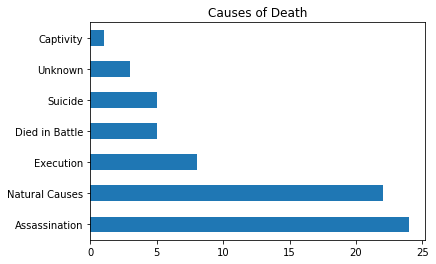

In [7]:
romans_data.Cause.value_counts().plot(kind='barh', title='Causes of Death');

Аха! Преждевременен и насилствен край. Къде би била романтиката иначе? Но тук мога да разделя два вида смърти: 'нормални' и 'насилствени'. Насилствени са `Assasination`, `Execution` и `Suicide`. Всички останали - нормални. Слагам самоубийството като насилствена смърт т.к. никой не се самоубива без да има причина и винаги самоубилите са били поставени пред "или го правя сам, или някой го прави за мен _много_ скоро". Оставям `Captivity` и `Died in Battle` като "нормални" т.к. това си е съвсем очакван начин да умре император и не е свързан с преждевременно прекратяване на управлението му поради вътрешни причини. Има ли смисъл това? Не знам.

In [8]:
violent = romans_data[(romans_data.Cause == 'Assassination') | (romans_data.Cause == 'Suicide') | (romans_data.Cause == 'Execution')]

print('Violent deaths: {} ({:.2f}%)'.format(len(violent), 100 * len(violent) / len(romans_data)))

Violent deaths: 37 (54.41%)


Всъщност, колко императора не са умерли в края на управленито си?

In [9]:
romans_data[romans_data['Reign End'] != romans_data['Death']][['Name', 'Death', 'Reign End', 'Cause', 'Killer']]

,Name,Death,Reign End,Cause,Killer
Index,,,,,
57,Lucinius I,0325-03-01T00:53:28+00:53,0324-09-18T00:53:28+00:53,Execution,Other Emperor
23,Geta,0211-12-19T00:53:28+00:53,0211-12-26T00:53:28+00:53,Assassination,Other Emperor
49,Diocletian,0311-12-03T00:53:28+00:53,0305-05-01T00:53:28+00:53,Natural Causes,Disease
61,Vetranio,0356-01-01T00:53:28+00:53,0350-12-25T00:53:28+00:53,Unknown,Unknown
50,Maximian,0310-07-15T00:53:28+00:53,0305-05-01T00:53:28+00:53,Suicide,Other Emperor
38,Valerian,0264-01-01T00:53:28+00:53,0260-01-01T00:53:28+00:53,Captivity,Opposing Army


Интересно, Гета е успял да управлява цяла седмица след като е умрял. Браво на него! Възможноста за зомби-император е интригуваща, но малко вероятно. Според мен по - скоро трябва да го броим като умрял в края на управлението си. Втори опит:

In [10]:
romans_data[romans_data['Reign End'] < romans_data['Death']][['Name', 'Death', 'Reign End', 'Cause', 'Killer']]

,Name,Death,Reign End,Cause,Killer
Index,,,,,
57,Lucinius I,0325-03-01T00:53:28+00:53,0324-09-18T00:53:28+00:53,Execution,Other Emperor
49,Diocletian,0311-12-03T00:53:28+00:53,0305-05-01T00:53:28+00:53,Natural Causes,Disease
61,Vetranio,0356-01-01T00:53:28+00:53,0350-12-25T00:53:28+00:53,Unknown,Unknown
50,Maximian,0310-07-15T00:53:28+00:53,0305-05-01T00:53:28+00:53,Suicide,Other Emperor
38,Valerian,0264-01-01T00:53:28+00:53,0260-01-01T00:53:28+00:53,Captivity,Opposing Army


Вече е по - добре. Браво Деоклициан, [зелките](http://forumromanum.org/literature/victor_ep.html#39) са по - яки от насилствена смърт при всички положения :D

Да разгледаме дистрибуцията на продължителност на управление. Но първо, сещам се че Август (отново той!) е роден и управлява преди новата ера, но датите в data set-а изглеждат все едно е управлявал от 26та до 14та година. Като изключим машина на времето остава варианта просто data set-а да не може да представя дати от преди новата ера заради не добре подбраният стандарт за дати. Ще трябва да се справим с това.

Интересно е и как всички важни събития в този период са се случвали в 00:53:28. Ides of March паста да яде! Ако бях император, определено щях много да внимавам около това време. Може би да се заключвам в добре окрепена стая, на щрек и въоръжен?

Супер извратената часова зона няма да я коментирам.

In [11]:
type(romans_data.at[1, 'Death'])

str

Ахъм! Датите ни все още са низове. Ще трябва да се направи нещо и за това. Какво ли му е на `parse_dates` на [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv)?

In [12]:
from dateutil import parser
from datetime import datetime

date_fields = ['Reign Start', 'Reign End', 'Birth', 'Death']

def parse_date(val):
    if isinstance(val, datetime):
        return val
    if val is np.nan or val == '' or val is None or val == 'nan':
        return np.nan
    try:
        return parser.parse(val)
    except:
        return np.nan

for date_field in date_fields:
    romans_data[date_field] = romans_data[date_field].map(parse_date)

Сега, като всичко вече е истински дати е време да направим нещата с епохите по правилният начин. Някак си неудобно е да се занимавам с отрицателни числа. За тази цел ще преместа календара да започва от раждането на... (_барабани_...) Август! Така и така това си е доста по - изискано от календар с начало раждането на анонимен еврейски дърворезбар в Сирия. При това леко не с всичкия си и доста религиозен. Друго си е _истинско_ божество като Август, нали така? Това, че всички сметки стават много по - прости е само страничен ефект, честно.

In [13]:
from datetime import timedelta

christ_epoch = parser.parse('0001-01-01T00:00:00+00:53')

td = (romans_data.at[1, 'Birth'] - christ_epoch) - 2 * timedelta(days=365)
reign_age = romans_data.at[1, 'Birth'] - romans_data.at[1, 'Reign Start']
augustus_dates = romans_data[romans_data.Name == 'Augustus'][date_fields]

def redefine_calendar(val):
    if val is np.nan or val == np.nan:
        return val
    return val + td

# Преместваме датите на всички, така че нулева година да е раждането на Август
for date_field in date_fields:
    romans_data[date_field] = romans_data[date_field].map(redefine_calendar)

# Поправяме датите на самият Augustus
romans_data.at[1, 'Birth'] = christ_epoch
romans_data.at[1, 'Reign Start'] = christ_epoch + reign_age - 2 * timedelta(days=365)

romans_data[romans_data.Name == 'Augustus'][date_fields]

,Reign Start,Reign End,Birth,Death
Index,,,,
1,0035-09-09 00:00:00+00:53,0075-05-11 01:46:56+00:53,0001-01-01 00:00:00+00:53,0075-05-11 01:46:56+00:53


Wow, това беше трудно! http://www.biblestudentarchives.com/documents/CalculatingBC-AD.pdf

Нека сега разгледаме по колко време са управлявали императорите.

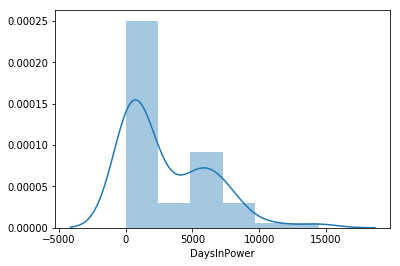

In [14]:
import seaborn as sns

romans_data['DaysInPower'] = (romans_data['Reign End'] - romans_data['Reign Start']).map(lambda x: x.days)

sns.distplot(romans_data.DaysInPower);

Добре, тази картинка показва "скорошен" край, за да допълни преждевременен и насилствен от последната. Лошото е, че разпределението не ми подсказва нищо особено.

### Възраст на "изкачване" на трона

Звучи съвсем логично, че императорите-деца имат значително по - висок шанс за любимата ни вече внезапна-и-насилствена-смърт. Не бих заложил и на старците да се задържат. Гадна работа. По тази причина си мисля, че колона "възраст на изкачване" ще е полезна.

MUCH ERROR! So exception <class 'ValueError'>: cannot convert float NaN to integer


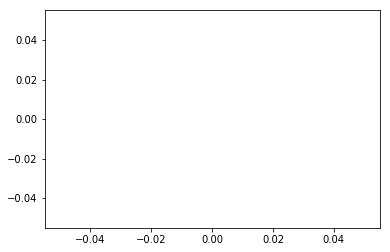

In [15]:
try:
    sns.distplot((romans_data['Reign Start'] - romans_data['Birth']).map(lambda x: x.days / 365));
except ValueError as e:
    print("MUCH ERROR! So exception {}: {}".format(type(e), e))

Ох, явно за някои не знам кога са родени. Тъжна работа! Ще трябва да си измислим дати. Бих предположил, че е добре да предположим, че са станали императори на някакво подобно време, като остналите. И от "започване на управлениет" да изчислим нашата измислена дата на раждане.

In [16]:
romans_data['AgeOfSuccession'] = (romans_data['Reign Start'] - romans_data['Birth']).map(lambda x: x.days / 365)

romans_data['AgeOfSuccession'].describe()

count    63.000000
mean     39.438704
std      19.485719
min     -27.180822
25%      28.713699
50%      40.147945
75%      54.360274
max      79.271233
Name: AgeOfSuccession, dtype: float64

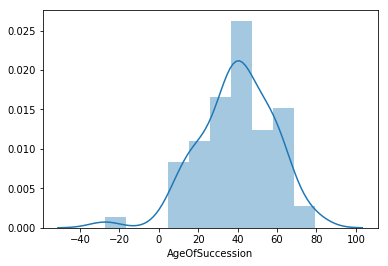

In [17]:
sns.distplot(romans_data['AgeOfSuccession'].fillna(romans_data['AgeOfSuccession'].mean()));

WTF? Някой е станал император на -27!?

In [18]:
romans_data[['Name'] + date_fields][romans_data.AgeOfSuccession < 0]

,Name,Reign Start,Reign End,Birth,Death
Index,,,,,
2,Tiberius,0075-06-10 01:46:56+00:53,0097-12-06 01:46:56+00:53,0102-08-09 01:46:56+00:53,0097-12-06 01:46:56+00:53


Хм, това е от промяната на епохата. Не съм се сетил, че и други освен Август може да са родени преди новата ера. Дали съм потроиш данните безвъзвратно?

In [19]:
# Сигурен съм, че и Клавдий е роден пр.н.е.
romans_data[['Name'] + date_fields][romans_data.Name == 'Claudius']

,Name,Reign Start,Reign End,Birth,Death
Index,,,,,
4,Claudius,0101-10-18 01:46:56+00:53,0115-07-06 01:46:56+00:53,0070-04-23 01:46:56+00:53,0115-07-06 01:46:56+00:53


In [20]:
augustus_birth_ad = parser.parse('0063-09-23T00:53:28+00:53')

# Да се върнем в начално състояние
romans_data.at[2, 'Birth'] = christ_epoch + (augustus_birth_ad - parser.parse('0042-11-16T00:53:28+00:58')) - 2 * timedelta(days=365)
romans_data.at[4, 'Birth'] = christ_epoch + (augustus_birth_ad - parser.parse('0010-08-01T00:53:28+00:58')) - 2 * timedelta(days=365)

romans_data[['Name'] + date_fields][romans_data.Name == 'Claudius']

,Name,Reign Start,Reign End,Birth,Death
Index,,,,,
4,Claudius,0101-10-18 01:46:56+00:53,0115-07-06 01:46:56+00:53,0052-02-24 00:05:00+00:53,0115-07-06 01:46:56+00:53


Накрая ще стана доста добър с тези BC-AD сметки хахаха. Сега, да опитаме отново!

In [21]:
romans_data['AgeOfSuccession'] = (romans_data['Reign Start'] - romans_data['Birth']).map(lambda x: x.days / 365)

romans_data['AgeOfSuccession'].describe()

count    63.000000
mean     41.041487
std      17.618187
min       4.879452
25%      29.347945
50%      41.572603
75%      55.254795
max      79.271233
Name: AgeOfSuccession, dtype: float64

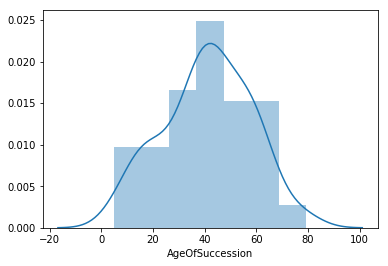

In [22]:
sns.distplot(romans_data['AgeOfSuccession'].fillna(romans_data['AgeOfSuccession'].mean()));

In [23]:
# Така, вече може да си запазим тази колона. Изглежда вче няма странни неща.
romans_data.AgeOfSuccession = romans_data.AgeOfSuccession.fillna(romans_data.AgeOfSuccession.mean())

Добре, това прилича вече на нещо разумно. Сега, предполагам, че е много вероятно да има връзка между възраста на изкачване на трона и продължителността на управлението.

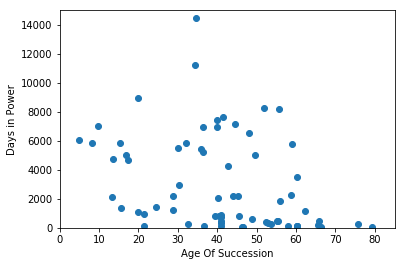

In [24]:
plt.close()

plt.scatter(romans_data.AgeOfSuccession, romans_data.DaysInPower)
plt.gca().set_xlim(0, 85)
plt.gca().set_ylim(0, 15000)
plt.gca().set_xlabel('Age Of Succession')
plt.gca().set_ylabel('Days in Power');

Ба! Никаква връзка, няма да е толкова лесно :( Значи ще трябва да се надяваме регресията да намери някакъв смисъл сред останалите данни.

In [25]:
# Удобно, от лекция 4 :D

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoding_columns = ['Birth City', 'Birth Province', 'Succession', 'Cause', 'Killer', 'Dynasty', 'Era']

romans_nona = romans_data.fillna("")
romans_encoders = {col: LabelEncoder().fit(romans_nona[col]) for col in encoding_columns}

def encode_categorical(data, columns, encoders):
    return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
                        index = data.index)

romans_encoded = encode_categorical(romans_nona, encoding_columns, romans_encoders)

romans_encoded.head(10)

,Birth City,Birth Province,Cause,Dynasty,Era,Killer,Succession
Index,,,,,,,
52,24,11,4,0,0,2,1
57,12,11,3,0,0,7,4
33,26,15,3,2,1,7,7
36,0,7,0,2,1,7,0
31,0,17,0,2,1,9,3
42,28,12,0,2,1,9,0
47,0,17,6,2,1,11,4
48,0,17,2,2,1,6,4
2,23,7,0,3,1,7,4


In [26]:
# Сега е време да направим огромната таблица!

one_hot_encoder = OneHotEncoder().fit(romans_encoded)
romans_sparse = one_hot_encoder.transform(romans_encoded)
romans_full = pd.np.concatenate([romans_sparse.todense(), romans_data[['AgeOfSuccession']]], axis=1)

romans_full.shape

(68, 89)

Разделяме си данните на няколко множества за трениране и тестване

In [27]:
from sklearn.model_selection import train_test_split

romans_days_in_power = romans_data.DaysInPower

x_train, x_test, y_train, y_test = train_test_split(romans_full, 
                                                    romans_days_in_power, 
                                                    test_size=0.3, 
                                                    random_state=42)

Време е за тъпа линейна регресия. Какво ще стане като имаме толкова повече feature-и от колкото данни, чудя се.

In [28]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Train set score: {}'.format(regressor.score(x_train, y_train)))
print('Test set score: {}'.format(regressor.score(x_test, y_test)))

Train set score: 1.0
Test set score: -5.122007855330234


/Users/iron4o/py-virt-env/py3/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Алелуя! Научило ги е на изуст. Как е възможно това за линейна регресия? A -5 е... не особено полезн модел. Освен да опитаме на ново с по - малко фийчъри. Да кажем, че града в който е роден човек и провинцията, в която е роден не ни се виждат много важни.

In [29]:
encoding_columns = ['Succession', 'Cause', 'Killer', 'Dynasty', 'Era']
romans_encoded = encode_categorical(romans_nona, encoding_columns, romans_encoders)

one_hot_encoder = OneHotEncoder().fit(romans_encoded)
romans_sparse = one_hot_encoder.transform(romans_encoded)
romans_full = pd.np.concatenate([romans_sparse.todense(), romans_data[['AgeOfSuccession']]], axis=1)

print(romans_full.shape)

(68, 40)


Добре, фийчърите вече са по - малко от данните. Това може да е полезно.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(romans_full, 
                                                    romans_days_in_power, 
                                                    test_size=0.3, 
                                                    random_state=42)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Train set score: {}'.format(regressor.score(x_train, y_train)))
print('Test set score: {}'.format(regressor.score(x_test, y_test)))

Train set score: 0.7837731284504257
Test set score: -0.45615278012025073


Това е известно подобрени! Не дали е от значение, но още се борим да се върнем над нулата. Нека пробваме с други фийчъри. Но междувременно това може да си го направим на малка функция.

In [31]:
def try_feature_set(encoding_columns, romans_nona, romans_encoders):
    romans_encoded = encode_categorical(romans_nona, encoding_columns, romans_encoders)
    one_hot_encoder = OneHotEncoder().fit(romans_encoded)
    romans_sparse = one_hot_encoder.transform(romans_encoded)
    romans_full_set = pd.np.concatenate([romans_sparse.todense(), romans_data[['AgeOfSuccession']]], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(romans_full_set, 
                                                        romans_days_in_power, 
                                                        test_size=0.3, 
                                                        random_state=42)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    
    return (regressor, regressor.score(x_train, y_train), regressor.score(x_test, y_test))

possible_combinations = [
    ['Succession', 'Killer'],
    ['Succession', 'Cause'],
    ['Succession', 'Cause', 'Killer'],
    ['Succession', 'Cause', 'Killer', 'Era'],
    ['Succession', 'Cause', 'Killer', 'Dynasty'],
    ['Cause', 'Killer', 'Dynasty', 'Era'],
    ['Cause', 'Killer', 'Dynasty'],
    ['Cause', 'Killer'],
    ['Cause', 'Killer', 'Era'],
    ['Cause'],
    ['Killer'],
    ['Succession'],
    ['Dynasty'],
    ['Era'],
    ['Era', 'Killer'],
    ['Era', 'Cause'],
    # Омръзна ми. Това са всички разумни варинати, за които се сещам.
]

for combination in possible_combinations:
    _, train_score, test_score = try_feature_set(combination, romans_nona, romans_encoders)
    print("--{}--\ntrain: {}\ntest: {}\n".format(', '.join(combination), train_score, test_score))

--Succession, Killer--
train: 0.4935706837183367
test: -0.17358005667873022

--Succession, Cause--
train: 0.5028024083686728
test: -0.13051075005313773

--Succession, Cause, Killer--
train: 0.5338331026577005
test: -0.3579543138087824

--Succession, Cause, Killer, Era--
train: 0.5460839010880241
test: -0.36944243484749273

--Succession, Cause, Killer, Dynasty--
train: 0.7837731284504257
test: -0.4561527801202383

--Cause, Killer, Dynasty, Era--
train: 0.7264303990698757
test: -0.318482579956167

--Cause, Killer, Dynasty--
train: 0.7264303990698757
test: -0.3184825799561606

--Cause, Killer--
train: 0.3779940973311289
test: 0.27042210007790823

--Cause, Killer, Era--
train: 0.4090799907651612
test: 0.2766664370662204

--Cause--
train: 0.28829988759974623
test: 0.11970424067139152

--Killer--
train: 0.35615479682410345
test: 0.15475614564479045

--Succession--
train: 0.35550608341975243
test: -0.39064657010041515

--Dynasty--
train: 0.5041486052076813
test: -0.34073439708304587

--Era--


О! Имаме някакъв напредък. Само с Cause, Killer, Era и AgeOfSuccession имаме вече положителни числа yey! Сега ще опитам да върна местата на раждане по един или друг начин.

In [32]:
possible_combinations = [
    ['Cause', 'Killer', 'Era', 'Birth City'],
    ['Cause', 'Killer', 'Era', 'Birth Province'],
    ['Cause', 'Killer', 'Era', 'Birth City', 'Birth Province'],
]

for combination in possible_combinations:
    _, train_score, test_score = try_feature_set(combination, romans_nona, romans_encoders)
    print("--{}--\ntrain: {}\ntest: {}\n".format(', '.join(combination), train_score, test_score))

--Cause, Killer, Era, Birth City--
train: 0.7150785967917395
test: -0.4392627523777879

--Cause, Killer, Era, Birth Province--
train: 0.5647293614684562
test: -0.34805362980804944

--Cause, Killer, Era, Birth City, Birth Province--
train: 0.7499720343468856
test: -0.7986501037846774



Не, не помагат изобщо! Но още си спомням теорията си за роден във военен град или не. Според мен си струва да се опита.

In [33]:
def emperor_type_by_birth_place(birth_place):
    if birth_place in ['Sirmium', 'Singidunum']:
        return 'Soldier'
    if birth_place in ['Rome', 'Constantinople']:
        return 'Patrician'
    return 'Pleb'

romans_data['EmperorType'] = romans_data['Birth City'].map(emperor_type_by_birth_place)
romans_nona = romans_data.fillna("")
encoding_columns += ['EmperorType']
romans_encoders = {col: LabelEncoder().fit(romans_nona[col]) for col in encoding_columns}

possible_combinations = [
    ['EmperorType'],
    ['Cause', 'EmperorType'],
    ['Cause', 'Era', 'EmperorType'],
    ['Killer', 'EmperorType'],
    ['Killer', 'Era', 'EmperorType'],
    ['Cause', 'Killer', 'EmperorType'],
    ['Cause', 'Killer', 'Era', 'EmperorType'],
    ['Cause', 'Killer', 'Dynasty', 'EmperorType'],
    ['Cause', 'Killer', 'Dynasty', 'Era', 'EmperorType'],
]

for combination in possible_combinations:
    _, train_score, test_score = try_feature_set(combination, romans_nona, romans_encoders)
    print("--{}--\ntrain: {}\ntest: {}\n".format(', '.join(combination), train_score, test_score))

--EmperorType--
train: 0.1272584480842145
test: 0.027132490942511134

--Cause, EmperorType--
train: 0.32158752420439496
test: 0.0403653820483596

--Cause, Era, EmperorType--
train: 0.3376797749734055
test: 0.04273202365383966

--Killer, EmperorType--
train: 0.4075901875431346
test: -0.18496821474141512

--Killer, Era, EmperorType--
train: 0.44878593552391044
test: -0.22437665869150325

--Cause, Killer, EmperorType--
train: 0.42716573301908967
test: -0.060306871162425724

--Cause, Killer, Era, EmperorType--
train: 0.4854787321084404
test: -0.14935588874162264

--Cause, Killer, Dynasty, EmperorType--
train: 0.7487172187225626
test: -1.0662925695602627

--Cause, Killer, Dynasty, Era, EmperorType--
train: 0.7487172187225625
test: -1.0662925695602685



Единственият извод, който мога да си направя тук е: колкото по - малко фийчъри, толкова по - добре :D За това нека се върнем няколко стъпки назад.

In [34]:
# Още на графиката си личеше, че няма да стане. Но да го сравним с останалите резултати.
x_train, x_test, y_train, y_test = train_test_split(romans_data[['AgeOfSuccession']], 
                                                    romans_days_in_power, 
                                                    test_size=0.3, 
                                                    random_state=42)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Train set score: {}'.format(regressor.score(x_train, y_train)))
print('Test set score: {}'.format(regressor.score(x_test, y_test)))

Train set score: 0.0971504977222345
Test set score: 0.09046578328236898


Хм. Имма друга идея. Струва ми се логично, че времето което е управлявал _прединият_ император може да има значение за текущият. Така, ако времената са лоши е по - вероятно императорът да не се задържи т.к. се е качил на трона по време на граждански войни, несигурност и други неприятни фактори. Лоши времена биха били [69AD - годината на четерите императора](https://en.wikipedia.org/wiki/Year_of_the_Four_Emperors), [193AD - годината на петте императора](https://en.wikipedia.org/wiki/Year_of_the_Five_Emperors), [238AD - годината на шестте императора](https://en.wikipedia.org/wiki/Year_of_the_Six_Emperors) и т.н. Забелязва се как `Х` в "Годината на X императора" продължава да расте за известно време. Със сигурност на римляните по това време хич не им е било забавно!

In [35]:
romans_with_prev = romans_data.copy()
romans_with_prev.PreviousEmperorRule = romans_with_prev.DaysInPower

# Възползваме се от това, че индексите на императорите са поредни. Не съвсем, когато става въпрос за такива
# управляващи по едно и също време, но пак е достатъчно близо.
for ind in range(2, len(romans_data)+1):
    prev_ind = ind-1
    romans_with_prev.at[ind, 'PreviousEmperorRule'] = romans_data.at[prev_ind, 'DaysInPower']

# Махаме Август т.к. за него нямаме предишен император
romans_with_prev = romans_with_prev.drop(1)

Нека видим дали има някаква очевидна връзка между новата колона и target-а.

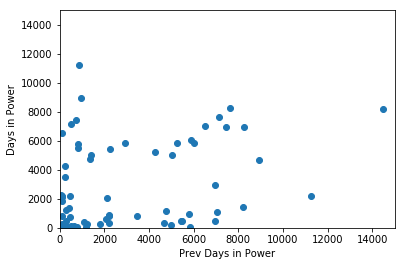

In [36]:
plt.close()

plt.scatter(romans_with_prev.PreviousEmperorRule, romans_with_prev.DaysInPower)
plt.gca().set_xlim(0, 15000)
plt.gca().set_ylim(0, 15000)
plt.gca().set_xlabel('Prev Days in Power')
plt.gca().set_ylabel('Days in Power');

Не мога да кажа, че виждам особено сериозна връзка.

In [37]:
romans_nona = romans_with_prev.fillna("")
romans_encoded = encode_categorical(romans_nona, encoding_columns, romans_encoders)
with_prev_encoder_one_hot = OneHotEncoder().fit(romans_encoded)
romans_sparse = with_prev_encoder_one_hot.transform(romans_encoded)
romans_full_set = pd.np.concatenate([romans_sparse.todense(), romans_with_prev[['AgeOfSuccession', 'PreviousEmperorRule']]], axis=1)
romans_with_prev_full = romans_full_set.copy()
x_train, x_test, y_train, y_test = train_test_split(romans_full_set, 
                                                    romans_with_prev.DaysInPower, 
                                                    test_size=0.3, 
                                                    random_state=42)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Train set score: {}'.format(regressor.score(x_train, y_train)))
print('Test set score: {}'.format(regressor.score(x_test, y_test)))

Train set score: 0.7005317294713329
Test set score: -0.3072326899241511


Отново много лош резултат. Т.к. отново използваме много feature-и. Да ги намаилм малкото отново. Спомням си, че от преди малко най - добрите опити бяха с (Cause, Killer), (Cause, Killer, Era), (Cause,), (Killer,). Ще ги опитам отново, но с добавени PreviousEmperorRule.

In [38]:
concatenated = ['AgeOfSuccession', 'PreviousEmperorRule']
possible_combinations = [
    ['Cause', 'Killer'],
    ['Cause', 'Killer', 'Era'],
    ['Cause'],
    ['Killer'],
]

for encoding_columns in possible_combinations:
    romans_encoded = encode_categorical(romans_nona, encoding_columns, romans_encoders)
    one_hot_encoder = OneHotEncoder().fit(romans_encoded)
    romans_sparse = one_hot_encoder.transform(romans_encoded)
    romans_full_set = pd.np.concatenate([romans_sparse.todense(), romans_with_prev[concatenated]], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(romans_full_set, 
                                                        romans_with_prev.DaysInPower, 
                                                        test_size=0.3, 
                                                        random_state=42)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)

    print("Columns: {}".format(encoding_columns + concatenated))
    print("Train set score: {}".format(regressor.score(x_train, y_train)))
    print("Test set score: {}\n".format(regressor.score(x_test, y_test)))

Columns: ['Cause', 'Killer', 'AgeOfSuccession', 'PreviousEmperorRule']
Train set score: 0.4788652489940492
Test set score: -0.5979999858889091

Columns: ['Cause', 'Killer', 'Era', 'AgeOfSuccession', 'PreviousEmperorRule']
Train set score: 0.537600375075316
Test set score: -0.7505662478375827

Columns: ['Cause', 'AgeOfSuccession', 'PreviousEmperorRule']
Train set score: 0.3907530300521164
Test set score: -0.5957525225093914

Columns: ['Killer', 'AgeOfSuccession', 'PreviousEmperorRule']
Train set score: 0.44205312655426826
Test set score: -0.19575746250478399



## Други алгоритми

Мисля, че дойде времето да се опита с нещо различно от линейна регресия. Вече нямам никакви нови идеи. Първо, вижда ми се логично, че kNN може да е добър лгоритъм за намиране на модел т.к. ако император е поставен в подобна ситуация очакваме да има подобни резултати и продължителност на управление?

In [39]:
from sklearn.neighbors import KNeighborsRegressor

x_train, x_test, y_train, y_test = train_test_split(romans_with_prev_full, 
                                                    romans_with_prev.DaysInPower, 
                                                    test_size=0.3, 
                                                    random_state=42)

for n in range(1, 6):
    regressor = KNeighborsRegressor(n_neighbors=n)
    regressor.fit(x_train, y_train)

    print("{} nieghtbours".format(n))
    print("Train set score: {}".format(regressor.score(x_train, y_train)))
    print("Test set score: {}\n".format(regressor.score(x_test, y_test)))

1 nieghtbours
Train set score: 1.0
Test set score: -1.1462780866854434

2 nieghtbours
Train set score: 0.7238198042029338
Test set score: -0.5403104390503495

3 nieghtbours
Train set score: 0.5506431424623852
Test set score: -0.516329873835228

4 nieghtbours
Train set score: 0.4463598340200565
Test set score: -0.8675329934197318

5 nieghtbours
Train set score: 0.40762992153556377
Test set score: -1.129820127162263



По - добре от първоначалните опити с линейна регресия, но все още крайно недостатъчно. Може би random forest т.к. лесно ще се отърве от излишните данни?

In [40]:
from sklearn.ensemble import RandomForestRegressor

for e in [5, 10, 100, 200, 500, 1000]:
    regressor = RandomForestRegressor(n_estimators=e, n_jobs=3, random_state=42)
    regressor.fit(x_train, y_train)
    print("{} n_estimators".format(e))
    print("Train set score: {}".format(regressor.score(x_train, y_train)))
    print("Test set score: {}\n".format(regressor.score(x_test, y_test)))

5 n_estimators
Train set score: 0.8164681140330194
Test set score: -0.0591596668716341

10 n_estimators
Train set score: 0.8750141335956695
Test set score: -0.2214087543299441

100 n_estimators
Train set score: 0.8880798436248347
Test set score: -0.09026132130643649

200 n_estimators
Train set score: 0.8875974567356074
Test set score: -0.06617634946702311

500 n_estimators
Train set score: 0.8892950529571018
Test set score: -0.074315415979465

1000 n_estimators
Train set score: 0.8911278825960002
Test set score: -0.06711529914334347



Яко overfitting. Интересно ми е, какво ли си мисли, че са най - полезните фийчъри?

In [41]:
# Взимам си най - хубавото дърво
regressor = RandomForestRegressor(n_estimators=e, n_jobs=3, random_state=200)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=3,
           oob_score=False, random_state=200, verbose=0, warm_start=False)

Feature ranking:
1. feature 43 (0.273846)
2. feature 42 (0.192588)
3. feature 4 (0.120339)
4. feature 38 (0.083229)
5. feature 9 (0.037466)
6. feature 22 (0.032953)


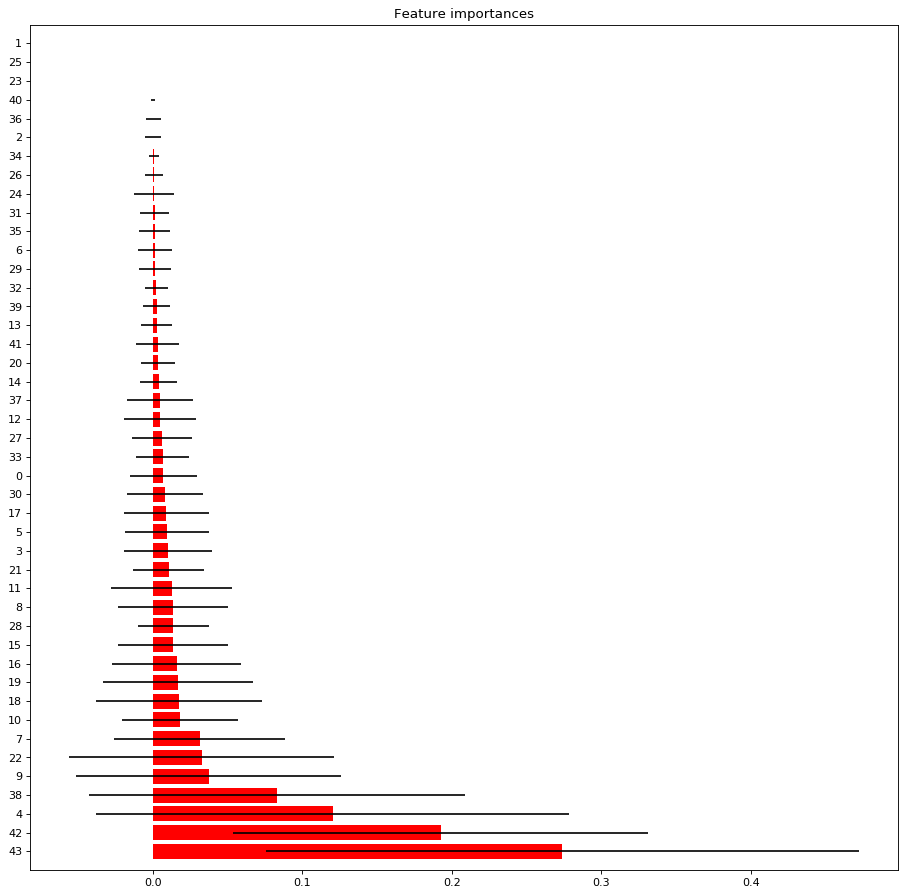

In [65]:
features_count = romans_with_prev_full.shape[1]

importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(min(6, features_count)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.close()
plt.figure(figsize=(14, 14), dpi=80)
plt.title("Feature importances")
plt.barh(range(features_count), importances[indices],
       color="r", xerr=std[indices], align="center")
plt.yticks(range(features_count), indices)
plt.ylim([-1, features_count])
plt.show()

Подозирам, че feature 43 и 42 са PreviousEmperorRule и AgeOfSuccession. От тази гледна точка random forest-а се съгласява с мен, че са съгласни :) Но всъщност не знам как да го проверя. Как да обърна тези feature index-и отново към имената на фийчърите? Ясно е, че за много от тях след OneHot ще са от типа неща от сорта "IsDominata", "IsPrincipate" и т.н.

Това нищо съществено не ми подсказва. Може би, както предполагах, няма никаква реална зависимост между тези данни и продължителноста на управление на император. Мисля да спра до тук. Но имам и няколко други идеи:

- Да се направят bin-ове с деситилетията и да се добави всички дати на императорите в някакъв bin
- Да се опита със SVM т.к. уж те се справяли когато имаш много feature-и малко данни